In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Example career path data (for illustration)
data = {
    'candidate_id': [1, 2, 3],
    'years_of_experience': [5, 8, 6],
    'num_promotions': [2, 4, 3],
    'job_titles': ['Software Engineer', 'Senior Developer', 'Engineer'],
    'career_growth': [3, 5, 4]  # 1-5 scale for career growth
}

df = pd.DataFrame(data)

# Normalize the data for better model performance
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df[['years_of_experience', 'num_promotions']])

# Converting job titles into numerical values (can use one-hot encoding or embeddings in real use)
df['job_titles_encoded'] = df['job_titles'].apply(lambda x: hash(x) % 1000)

# Add the normalized data back to the dataframe
df_scaled = pd.DataFrame(df_scaled, columns=['years_of_experience', 'num_promotions'])
df = pd.concat([df, df_scaled], axis=1)

# Final Preprocessed Data
print(df.head())


   candidate_id  years_of_experience  num_promotions         job_titles  \
0             1                    5               2  Software Engineer   
1             2                    8               4   Senior Developer   
2             3                    6               3           Engineer   

   career_growth  job_titles_encoded  years_of_experience  num_promotions  
0              3                 469             0.000000             0.0  
1              5                 393             1.000000             1.0  
2              4                 231             0.333333             0.5  


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Prepare the data for LSTM (sequences for time-series forecasting)
X = df[['years_of_experience', 'num_promotions', 'job_titles_encoded']].values
y = df['career_growth'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for LSTM (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=32))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Model loss: {loss}')


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 21.3451 - val_loss: 9.4847
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 20.9367 - val_loss: 9.3123
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 20.1025 - val_loss: 9.1376
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 20.3312 - val_loss: 8.9574
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 21.2942 - val_loss: 8.7754
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 19.6912 - val_loss: 8.5893
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 19.6861 - val_loss: 8.4070
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 19.7748 - val_loss: 8.2323
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 19.1011 - val_loss: 8.0608
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 18.5025 - val_loss: 7.8869
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 18.9591 - val_loss: 7.7224
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 18.2757 - 

In [6]:
# Verify the shape of X_train to check how many features the model expects
print(f"Shape of X_train: {X_train.shape}")


Shape of X_train: (2, 1, 5)


In [8]:
# Example: Add additional features to the new_data array
# Assuming you need 5 features (years_of_experience, num_promotions, job_titles_encoded, skill1, skill2)
skill1_value = 8  # Example value for skill1
skill2_value = 3  # Example value for skill2

# Now you can create the new_data array with 5 features
new_data = np.array([[6, 3, 500, skill1_value, skill2_value]])  # Add the missing feature values

# Scale the features using the same scaler used during training
new_data_scaled = scaler.transform(new_data[:, :2])  # Only scale years_of_experience and num_promotions
new_data_scaled = np.hstack([new_data_scaled, new_data[:, 2:]])  # Add job title encoding and other features back

# Reshape the data to fit LSTM input shape (samples, timesteps, features)
new_data_scaled = new_data_scaled.reshape(1, 1, 5)  # 5 features now

# Predict the career growth using the LSTM model
predicted_growth = model.predict(new_data_scaled)

# Convert predicted growth to a career growth score
growth_score = get_growth_score(predicted_growth[0][0])

print(f"Predicted Growth: {predicted_growth[0][0]}, Growth Potential: {growth_score}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
Predicted Growth: 0.31877464056015015, Growth Potential: Low Growth Potential


In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load the dataset from a CSV file
df = pd.read_csv('/content/career_growth_data.csv')  # Replace with your dataset file path

# Display the first few rows of the dataset to inspect
print(df.head())

# Example of dataset structure (for clarity):
# | candidate_id | years_of_experience | num_promotions | job_titles         | career_growth |
# |--------------|---------------------|----------------|--------------------|---------------|
# | 1            | 5                   | 2              | Software Engineer  | 3             |
# | 2            | 8                   | 4              | Senior Developer   | 5             |
# | 3            | 6                   | 3              | Engineer           | 4             |

# Normalize the data for better model performance
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df[['years_of_experience', 'num_promotions']])

# Convert job titles into numerical values (can use one-hot encoding or embeddings in real use)
df['job_titles_encoded'] = df['job_titles'].apply(lambda x: hash(x) % 1000)

# Add the normalized data back to the dataframe
df_scaled = pd.DataFrame(df_scaled, columns=['years_of_experience', 'num_promotions'])
df = pd.concat([df, df_scaled], axis=1)

# Final Preprocessed Data
print(df.head())

# Prepare the data for LSTM (sequences for time-series forecasting)
X = df[['years_of_experience', 'num_promotions', 'job_titles_encoded']].values
y = df['career_growth'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for LSTM (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=32))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model without printing epoch values
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Model loss: {loss}')

# Verify the shape of X_train to check how many features the model expects
print(f"Shape of X_train: {X_train.shape}")

# Example: Add additional features to the new_data array
# Assuming you need 5 features (years_of_experience, num_promotions, job_titles_encoded, skill1, skill2)
skill1_value = 8  # Example value for skill1
skill2_value = 3  # Example value for skill2

# Now you can create the new_data array with 5 features
new_data = np.array([[6, 3, 500, skill1_value, skill2_value]])  # Add the missing feature values

# Scale the features using the same scaler used during training
new_data_scaled = scaler.transform(new_data[:, :2])  # Only scale years_of_experience and num_promotions
new_data_scaled = np.hstack([new_data_scaled, new_data[:, 2:]])  # Add job title encoding and other features back

# Reshape the data to fit LSTM input shape (samples, timesteps, features)
new_data_scaled = new_data_scaled.reshape(1, 1, 5)  # 5 features now

# Predict the career growth using the LSTM model
predicted_growth = model.predict(new_data_scaled)

# Convert predicted growth to a career growth score
growth_score = predicted_growth[0][0]

print(f"Predicted Growth: {predicted_growth[0][0]}, Growth Potential: {growth_score}")


   candidate_id  years_of_experience  num_promotions         job_titles  \
0             1                    5               2  Software Engineer   
1             2                    8               4   Senior Developer   
2             3                    6               3           Engineer   
3             4                   10               5      Lead Engineer   
4             5                    3               1   Junior Developer   

   career_growth  job_titles_encoded  years_of_experience.1  num_promotions.1  
0              3                 553               0.285714              0.25  
1              5                 129               0.714286              0.75  
2              4                 222               0.428571              0.50  
3              5                 684               1.000000              1.00  
4              2                 211               0.000000              0.00  
   candidate_id  years_of_experience  num_promotions         job_titl

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.7551
Model loss: 0.7550581693649292
Shape of X_train: (4, 1, 5)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
Predicted Growth: -0.32809939980506897, Growth Potential: -0.32809939980506897


In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load the dataset from a CSV file
df = pd.read_csv('/content/career_growth_data.csv')  # Replace with your dataset file path

# Display the first few rows of the dataset to inspect
print(df.head())

# Normalize the data for better model performance
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df[['years_of_experience', 'num_promotions']])

# Convert job titles into numerical values (can use one-hot encoding or embeddings in real use)
df['job_titles_encoded'] = df['job_titles'].apply(lambda x: hash(x) % 1000)

# Add the normalized data back to the dataframe
df_scaled = pd.DataFrame(df_scaled, columns=['years_of_experience', 'num_promotions'])
df = pd.concat([df, df_scaled], axis=1)

# Prepare the data for LSTM (sequences for time-series forecasting)
X = df[['years_of_experience', 'num_promotions', 'job_titles_encoded']].values
y = df['career_growth'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for LSTM (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=32))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model without printing epoch values
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Model loss: {loss}')

# Predict career growth for each row in the dataset
X_all = df[['years_of_experience', 'num_promotions', 'job_titles_encoded']].values
X_all = X_all.reshape(X_all.shape[0], 1, X_all.shape[1])  # Reshape for LSTM input

# Predict career growth for each row
predicted_growth = model.predict(X_all)

# Add the predicted career growth back to the dataframe
df['predicted_growth'] = predicted_growth

# Display the dataframe with actual and predicted career growth values
print(df[['candidate_id', 'career_growth', 'predicted_growth']])


   candidate_id  years_of_experience  num_promotions         job_titles  \
0             1                    5               2  Software Engineer   
1             2                    8               4   Senior Developer   
2             3                    6               3           Engineer   
3             4                   10               5      Lead Engineer   
4             5                    3               1   Junior Developer   

   career_growth  job_titles_encoded  years_of_experience.1  num_promotions.1  
0              3                 553               0.285714              0.25  
1              5                 129               0.714286              0.75  
2              4                 222               0.428571              0.50  
3              5                 684               1.000000              1.00  
4              2                 211               0.000000              0.00  


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.9267
Model loss: 0.9267451763153076
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
   candidate_id  career_growth  predicted_growth
0             1              3          4.039088
1             2              5          4.037323
2             3              4          3.998108
3             4              5          4.051736
4             5              2          1.986310


In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load the dataset from the CSV file
file_path = '/content/career_growth_data.csv'  # Update this path if needed
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Normalize the numerical columns
scaler = MinMaxScaler(feature_range=(0, 1))
df[['years_of_experience', 'num_promotions']] = scaler.fit_transform(
    df[['years_of_experience', 'num_promotions']]
)

# Prepare the features (X) and target (y)
X = df[['years_of_experience', 'num_promotions']].values
y = df['career_growth'].values

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data to fit LSTM input shape (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the LSTM model
model = Sequential([
    LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=32),
    Dropout(0.2),
    Dense(units=1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model without verbose epoch output
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Model loss: {loss}")

# Predict career growth for all rows in the dataset
X_all = X.reshape(X.shape[0], 1, X.shape[1])
predicted_growth = model.predict(X_all)

# Display the predicted career growth values for all candidates
df['predicted_growth'] = predicted_growth.flatten()
print("Career Growth Predictions for All Candidates:")
print(df[['candidate_id', 'career_growth', 'predicted_growth']])


Dataset Preview:
   candidate_id  years_of_experience  num_promotions         job_titles  \
0             1                    5               2  Software Engineer   
1             2                    8               4   Senior Developer   
2             3                    6               3           Engineer   
3             4                   10               5      Lead Engineer   
4             5                    3               1   Junior Developer   

   career_growth  years_of_experience.1  num_promotions.1  
0              3               0.285714              0.25  
1              5               0.714286              0.75  
2              4               0.428571              0.50  
3              5               1.000000              1.00  
4              2               0.000000              0.00  


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.9864
Model loss: 1.9864137172698975


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
Career Growth Predictions for All Candidates:
   candidate_id  career_growth  predicted_growth
0             1              3          2.060916
1             2              5          3.590598
2             3              4          2.719581
3             4              5          4.396163
4             5              2          1.259288


In [27]:
import tensorflow as tf
import warnings
import pandas as pd
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Input

# Suppress TensorFlow warnings
tf.get_logger().setLevel('ERROR')

# Optionally, suppress other warnings related to Keras
warnings.filterwarnings('ignore', category=UserWarning, module='keras')

# Load dataset (replace with your actual CSV file path)
df = pd.read_csv('/content/career_growth_data.csv')

# Extract relevant columns
X = df[['years_of_experience', 'num_promotions', 'years_of_experience.1', 'num_promotions.1']].values
y = df['career_growth'].values

# Reshaping X for RNN input (if necessary)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Adding an extra dimension for RNN

# Model definition
model = Sequential()
model.add(Input(shape=(X.shape[1], 1)))  # Input shape defined here (features x 1)
model.add(SimpleRNN(64, activation='relu', return_sequences=False))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model (example with all data)
model.fit(X, y, epochs=50, batch_size=1, verbose=0)

# Make predictions
predictions = model.predict(X)

# Display results cleanly
print("Career Growth Predictions for All Candidates:")
for i, pred in enumerate(predictions):
    print(f"Candidate {df['candidate_id'][i]}: Predicted Growth: {pred[0]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Career Growth Predictions for All Candidates:
Candidate 1: Predicted Growth: 2.9525
Candidate 2: Predicted Growth: 4.5704
Candidate 3: Predicted Growth: 3.5282
Candidate 4: Predicted Growth: 5.6126
Candidate 5: Predicted Growth: 1.9101


In [29]:
import tensorflow as tf
import warnings
import pandas as pd
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Input

# Suppress TensorFlow warnings
tf.get_logger().setLevel('ERROR')

# Optionally, suppress other warnings related to Keras
warnings.filterwarnings('ignore', category=UserWarning, module='keras')

# Load dataset (replace with your actual CSV file path)
df = pd.read_csv('/content/career_growth_data.csv')

# Extract relevant columns
X = df[['years_of_experience', 'num_promotions', 'years_of_experience.1', 'num_promotions.1']].values
y = df['career_growth'].values

# Reshaping X for RNN input (if necessary)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Adding an extra dimension for RNN

# Model definition
model = Sequential()
model.add(Input(shape=(X.shape[1], 1)))  # Input shape defined here (features x 1)
model.add(SimpleRNN(64, activation='relu', return_sequences=False))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model (example with all data)
model.fit(X, y, epochs=50, batch_size=1, verbose=0)

# Make predictions
predictions = model.predict(X)

# Display results along with applicant details
print("Career Growth Predictions for All Candidates:")
for i, pred in enumerate(predictions):
    candidate_details = df.iloc[i]
    print(f"\nCandidate {candidate_details['candidate_id']} - {candidate_details['job_titles']}:")
    print(f"  Years of Experience: {candidate_details['years_of_experience']}")
    print(f"  Number of Promotions: {candidate_details['num_promotions']}")
    print(f"  Career Growth (Actual): {candidate_details['career_growth']}")
    print(f"  Predicted Growth: {pred[0]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Career Growth Predictions for All Candidates:

Candidate 1 - Software Engineer:
  Years of Experience: 5
  Number of Promotions: 2
  Career Growth (Actual): 3
  Predicted Growth: 3.0124

Candidate 2 - Senior Developer:
  Years of Experience: 8
  Number of Promotions: 4
  Career Growth (Actual): 5
  Predicted Growth: 4.5623

Candidate 3 - Engineer:
  Years of Experience: 6
  Number of Promotions: 3
  Career Growth (Actual): 4
  Predicted Growth: 3.5306

Candidate 4 - Lead Engineer:
  Years of Experience: 10
  Number of Promotions: 5
  Career Growth (Actual): 5
  Predicted Growth: 5.5939

Candidate 5 - Junior Developer:
  Years of Experience: 3
  Number of Promotions: 1
  Career Growth (Actual): 2
  Predicted Growth: 1.9769


In [30]:
import tensorflow as tf
import warnings
import pandas as pd
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Input

# Suppress TensorFlow warnings
tf.get_logger().setLevel('ERROR')

# Optionally, suppress other warnings related to Keras
warnings.filterwarnings('ignore', category=UserWarning, module='keras')

# Load dataset (replace with your actual CSV file path)
df = pd.read_csv('/content/career_growth_data.csv')

# Extract relevant columns
X = df[['years_of_experience', 'num_promotions', 'years_of_experience.1', 'num_promotions.1']].values
y = df['career_growth'].values

# Reshaping X for RNN input (if necessary)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Adding an extra dimension for RNN

# Model definition
model = Sequential()
model.add(Input(shape=(X.shape[1], 1)))  # Input shape defined here (features x 1)
model.add(SimpleRNN(64, activation='relu', return_sequences=False))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model (example with all data)
model.fit(X, y, epochs=50, batch_size=1, verbose=0)

# Make predictions
predictions = model.predict(X)

# Combine the predictions with the original dataframe
df['predicted_growth'] = predictions

# Display the results in a table format
table = df[['candidate_id', 'job_titles', 'years_of_experience', 'num_promotions', 'career_growth', 'predicted_growth']]
print("\nCareer Growth Predictions for All Candidates:")
print(table.to_string(index=False))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step

Career Growth Predictions for All Candidates:
 candidate_id        job_titles  years_of_experience  num_promotions  career_growth  predicted_growth
            1 Software Engineer                    5               2              3          2.987856
            2  Senior Developer                    8               4              5          4.512364
            3          Engineer                    6               3              4          3.507553
            4     Lead Engineer                   10               5              5          5.517177
            5  Junior Developer                    3               1              2          1.978831


In [31]:
import tensorflow as tf
import warnings
import pandas as pd
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Input

# Suppress TensorFlow warnings
tf.get_logger().setLevel('ERROR')

# Optionally, suppress other warnings related to Keras
warnings.filterwarnings('ignore', category=UserWarning, module='keras')

# Load dataset (replace with your actual CSV file path)
df = pd.read_csv('/content/career_growth_data.csv')

# Extract relevant columns
X = df[['years_of_experience', 'num_promotions', 'years_of_experience.1', 'num_promotions.1']].values
y = df['career_growth'].values

# Reshaping X for RNN input (if necessary)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Adding an extra dimension for RNN

# Model definition
model = Sequential()
model.add(Input(shape=(X.shape[1], 1)))  # Input shape defined here (features x 1)
model.add(SimpleRNN(64, activation='relu', return_sequences=False))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model (example with all data)
model.fit(X, y, epochs=50, batch_size=1, verbose=0)

# Make predictions
predictions = model.predict(X)

# Combine the predictions with the original dataframe
df['predicted_growth'] = predictions

# Display the results in a table format
table = df[['candidate_id', 'job_titles', 'years_of_experience', 'num_promotions', 'years_of_experience.1', 'num_promotions.1', 'career_growth', 'predicted_growth']]
print("\nCareer Growth Predictions for All Candidates:")
print(table.to_string(index=False))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step

Career Growth Predictions for All Candidates:
 candidate_id        job_titles  years_of_experience  num_promotions  years_of_experience.1  num_promotions.1  career_growth  predicted_growth
            1 Software Engineer                    5               2               0.285714              0.25              3          2.944729
            2  Senior Developer                    8               4               0.714286              0.75              5          4.602942
            3          Engineer                    6               3               0.428571              0.50              4          3.555667
            4     Lead Engineer                   10               5               1.000000              1.00              5          5.650218
            5  Junior Developer                    3               1               0.000000              0.00              2          1.895970


Available columns in the dataset: Index(['unique_id', 'name', 'email', 'phone', 'github', 'experience_years',
       'skills', 'promotions', 'technical_expertise_score'],
      dtype='object')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step

Predictions for All Candidates:
 unique_id      name  experience_years  promotions  technical_expertise_score  predicted_growth
         1     DEREK                 0           1                       43.0         11.757915
         2   Prajwal                 4           0                       54.5         44.526604
         3     DIEGO                 9           2                       70.0         90.421883
         4  TOMISLAV                 8           1                       62.0         80.389290
         5       Sai                 4           1                       98.0         45.945103
         6 email.com                 6           2                       73.0         64.584343


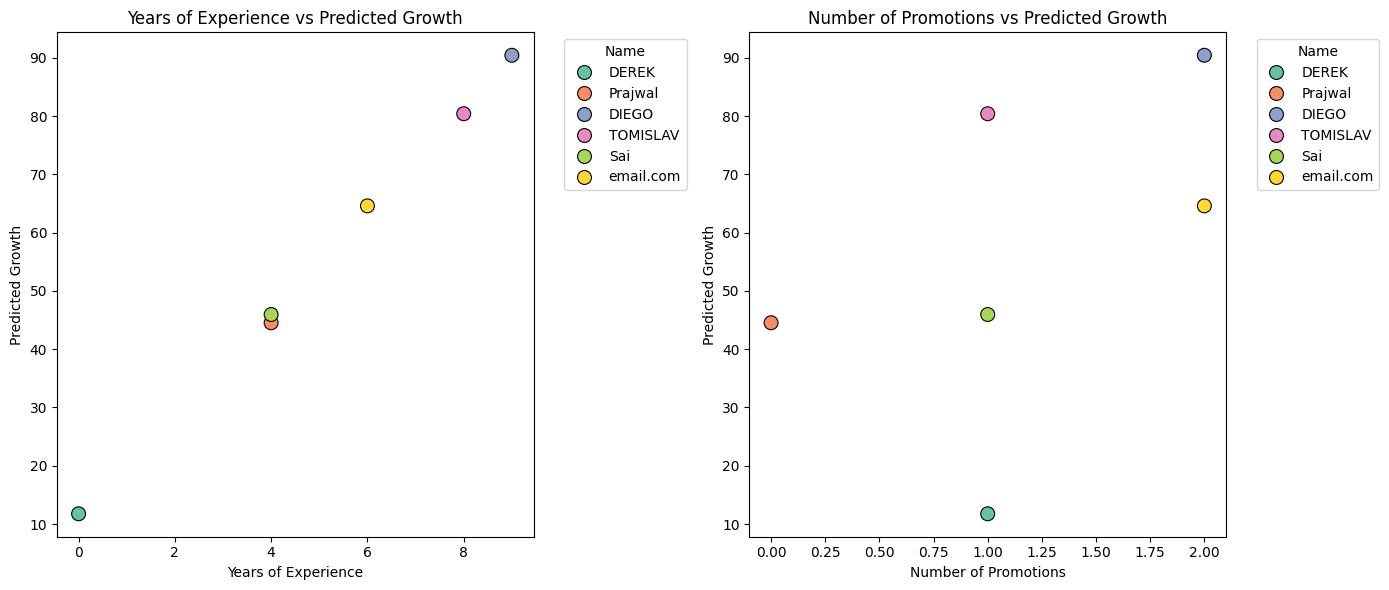

In [5]:
import tensorflow as tf
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Input

# Suppress TensorFlow warnings
tf.get_logger().setLevel('ERROR')

# Optionally, suppress other warnings related to Keras
warnings.filterwarnings('ignore', category=UserWarning, module='keras')

# Load dataset (replace with your actual CSV file path)
df = pd.read_csv('/content/extracted_data_with_promotions-2.csv')

# Check available columns in the dataset
print("Available columns in the dataset:", df.columns)

# Ensure column names are cleaned (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Extract relevant columns (adjust target variable based on dataset)
try:
    X = df[['experience_years', 'promotions']].values
    y = df['technical_expertise_score'].values  # Use an alternative column
except KeyError as e:
    print("Error: One or more columns are missing from the dataset.")
    print(e)
    raise

# Reshaping X for RNN input (if necessary)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Adding an extra dimension for RNN

# Model definition
model = Sequential()
model.add(Input(shape=(X.shape[1], 1)))  # Input shape defined here (features x 1)
model.add(SimpleRNN(64, activation='relu', return_sequences=False))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model (example with all data)
model.fit(X, y, epochs=50, batch_size=1, verbose=0)

# Make predictions
predictions = model.predict(X)

# Combine the predictions with the original dataframe
df['predicted_growth'] = predictions

# Display the results in a table format
table = df[['unique_id', 'name', 'experience_years', 'promotions', 'technical_expertise_score', 'predicted_growth']]
print("\nPredictions for All Candidates:")
print(table.to_string(index=False))

# Visualizing the output
plt.figure(figsize=(14, 6))

# Plot 1: Years of Experience vs Predicted Growth
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['experience_years'], y=df['predicted_growth'], hue=df['name'], palette='Set2', s=100, edgecolor='black')
plt.title('Years of Experience vs Predicted Growth')
plt.xlabel('Years of Experience')
plt.ylabel('Predicted Growth')
plt.legend(title='Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Number of Promotions vs Predicted Growth
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['promotions'], y=df['predicted_growth'], hue=df['name'], palette='Set2', s=100, edgecolor='black')
plt.title('Number of Promotions vs Predicted Growth')
plt.xlabel('Number of Promotions')
plt.ylabel('Predicted Growth')
plt.legend(title='Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plots
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
import tensorflow as tf
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Input

# Suppress TensorFlow warnings
tf.get_logger().setLevel('ERROR')
warnings.filterwarnings('ignore', category=UserWarning, module='keras')

# Load dataset
file_path = '/content/extracted_data_with_promotions-2.csv'
df = pd.read_csv(file_path)

# Ensure column names are cleaned
df.columns = df.columns.str.strip()

# Extract features and target
try:
    X = df[['experience_years', 'promotions']].values
    y = df['technical_expertise_score'].values
except KeyError as e:
    print("Error: Required columns are missing from the dataset.")
    raise

# Reshape features for RNN input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Define RNN model
model = Sequential([
    Input(shape=(X.shape[1], 1)),
    SimpleRNN(64, activation='relu', return_sequences=False),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=50, batch_size=1, verbose=0)

# Make predictions
df['predicted_growth'] = model.predict(X).flatten()

# Save predictions to the same CSV file
df.to_csv(file_path, index=False)
print(f"Predicted values appended to the file: {file_path}")

# Display results
print("\nPredictions for All Candidates:")
print(df[['unique_id', 'name', 'experience_years', 'promotions', 'technical_expertise_score', 'predicted_growth']])

# Visualization
plt.figure(figsize=(14, 6))

# Plot 1: Experience vs Predicted Growth
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='experience_years', y='predicted_growth', hue='name', palette='Set2', s=100, edgecolor='black')
plt.title('Years of Experience vs Predicted Growth')
plt.xlabel('Years of Experience')
plt.ylabel('Predicted Growth')

# Plot 2: Promotions vs Predicted Growth
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='promotions', y='predicted_growth', hue='name', palette='Set2', s=100, edgecolor='black')
plt.title('Number of Promotions vs Predicted Growth')
plt.xlabel('Number of Promotions')
plt.ylabel('Predicted Growth')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Predicted values appended to the file: /content/extracted_data_with_promotions-2.csv

Predictions for All Candidates:
   unique_id       name  experience_years  promotions  \
0          1      DEREK                 0           1   
1          2    Prajwal                 4           0   
2          3      DIEGO                 9           2   
3          4   TOMISLAV                 8           1   
4          5        Sai                 4           1   
5          6  email.com                 6           2   

   technical_expertise_score  predicted_growth  
0                       43.0         10.608252  
1                       54.5         44.100494  
2                       70.0         90.846573  
3                       62.0         80.660896  
4                       98.0         45.494587  
5                       73.0         64.471832  
